<a href="https://colab.research.google.com/github/DivyaNarayan0613/DivyaNarayan0613/blob/main/GenAI_Diffusion_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytorch-fid torch diffusers clip transformers accelerate

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.3 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-0.2.0-py3-none-any.whl size=6988 sha256=08a2106a3b5a0691bfd0bd2765efe02bc1661a71197c6915b9393656e58dabda
  Stored in direc

typing.List: Allows type hinting for lists.

torch: Used for handling tensor operations and enabling mixed-precision computations.

matplotlib.pyplot: Used to visualize generated images.

diffusers.StableDiffusionPipeline: Provides the functionality to load and use the Stable Diffusion model.

In [ ]:
from typing import List
import torch
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline, DDPMScheduler # Provides the functionality to load and use the Stable Diffusion model.

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

This script loads a Stable Diffusion model using the diffusers library and generates images from text prompts.

1️⃣ Load the Stable Diffusion Model
model_id: str → Name of the model (e.g., "CompVis/stable-diffusion-v1-4").

StableDiffusionPipeline.from_pretrained(model_id, ...) → Loads the pre-trained model.

torch_dtype=torch.float16 → Uses half-precision (fp16) for faster inference and lower memory usage.

revision="fp16" → Loads the fp16 version of the model (if available).

.to("cuda") → Moves the model to GPU for faster processing.

use_auth_token=False → If set to True, requires authentication for private models.

2️⃣ Generate Images from Text Prompts
pipe: StableDiffusionPipeline → Preloaded Stable Diffusion model.

prompts: List[str] → A list of text prompts (e.g., ["A futuristic cityscape", "A cat wearing sunglasses"]).

torch.autocast("cuda") → Enables mixed precision computation for better efficiency.

pipe(prompts) → Runs the text-to-image generation process.

results.images → Extracts the generated images.

3️⃣ Render the Generated Images
images: List → A list of PIL images generated by Stable Diffusion.

plt.figure(figsize=(10, 5)) → Creates a plot with a fixed size.

plt.subplot(1, len(images), i + 1) → Arranges the images in a single row.

plt.imshow(img) → Displays each image.

plt.axis("off") → Removes axis labels for a clean look.

plt.show() → Displays all images.



In [ ]:
from typing import List
import torch
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline

def load_model(model_id: str) -> StableDiffusionPipeline:
    """Load model with provided model_id."""
    return StableDiffusionPipeline.from_pretrained(
        model_id,
        torch_dtype=torch.float16,
        revision="fp16",
        use_auth_token=False  # Set to True if your model requires authentication.
    ).to("cuda")

def generate_images(pipe: StableDiffusionPipeline, prompts: List[str]) -> List:
    """Generate images based on provided prompts."""
    with torch.autocast("cuda"):
        results = pipe(prompts)
    return results.images

def render_images(images: List):
    """Plot the generated images."""
    plt.figure(figsize=(10, 5))
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.show()


# 2. Function: load_model

Loads a pretrained Stable Diffusion model given its model_id.

model_id (str): The identifier of the Stable Diffusion model from a repository like Hugging Face (e.g., "CompVis/stable-diffusion-v1-4").

torch_dtype=torch.float16: Uses half-precision for faster computations and reduced memory usage.

revision="fp16": Ensures the model is optimized for mixed-precision.

use_auth_token=False: Set to True if your model requires authentication for access.

.to("cuda"): Moves the model to a GPU for faster inference.

Return: A StableDiffusionPipeline object ready to generate images.

In [ ]:
# Execution
model_id = "CompVis/stable-diffusion-v1-4"
prompts = [
"A hyper-realistic photo of a friendly lion",
"A stylized oil painting of a NYC Brownstone"
]
pipe = load_model(model_id)
images = generate_images(pipe, prompts)
render_images(images)

Keyword arguments {'use_auth_token': False} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

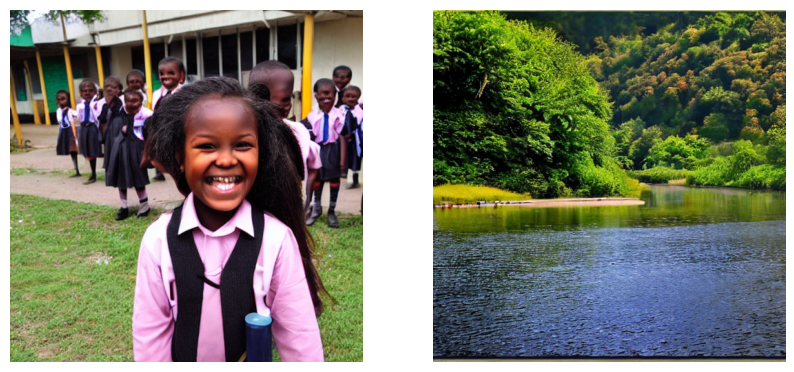

In [ ]:
# Execution
model_id = "CompVis/stable-diffusion-v1-4"
prompts = [
"A happy school going child",
"A serene riverside"
]
pipe = load_model(model_id)
images = generate_images(pipe, prompts)
render_images(images)